<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [10]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [11]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [13]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [14]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [16]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [17]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [18]:
# Create a NumPy array from the 'Class' column and assign it to Y
Y = data['Class'].to_numpy()

# Display the output to verify
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [19]:
# students get this 
# Standardize the data
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X)

# Reassign the standardized data to X
X = pd.DataFrame(X_standardized, columns=X.columns)

# Split the data into training and testing sets
# Assuming you want to split into 80% training and 20% testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Optional: Split the training data into training and validation sets
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the resulting sets to verify
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (72, 83)


<class 'NameError'>: name 'X_val' is not defined

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


we can see we only have 18 test samples.


In [20]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [39]:
# Create a logistic regression object
lr = LogisticRegression()

# Define the parameters for GridSearchCV
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create a GridSearchCV object
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8464285714285713


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
# Calculate the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Output the accuracy on the test data
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


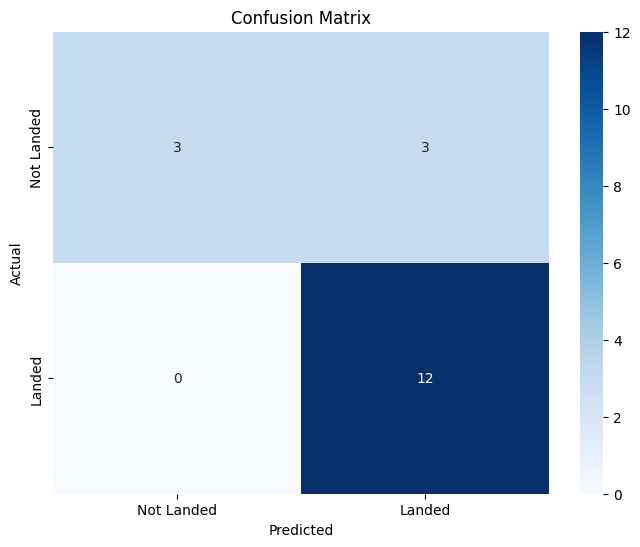

Accuracy on test data: 0.8333333333333334
True Positives: 12
False Positives: 3


In [23]:
#yhat=logreg_cv.predict(X_test)
#plot_confusion_matrix(Y_test,yhat)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Create a GridSearchCV object
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Generate predictions on the test set
yhat = logreg_cv.predict(X_test)

conf_matrix = confusion_matrix(Y_test, yhat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Landed', 'Landed'], 
            yticklabels=['Not Landed', 'Landed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

# Print the true positives and false positives
TP = conf_matrix[1, 1]  # True positives (Landed predicted as Landed)
FP = conf_matrix[0, 1]  # False positives (Not Landed predicted as Landed)
print("True Positives:", TP)
print("False Positives:", FP)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
from sklearn.svm import SVC

# Create a support vector machine object
svm = SVC()

# Define the parameters for GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and the best accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict the labels for the test data
yhat = svm_cv.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, yhat)




Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


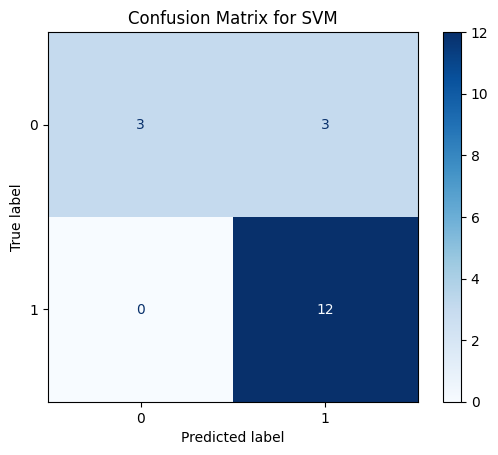

In [28]:
#yhat=svm_cv.predict(X_test)
#plot_confusion_matrix(Y_test,yhat)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_cv.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# param_grid = {
#    'min_samples_split': [2, 5, 10],
    
#}


# Define the parameter grid for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None, 0.5],  # Include valid options only
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree classifier object
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned Hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)


Tuned Hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.8875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [31]:
# Calculate accuracy on the test data
accuracy = tree_cv.score(X_test, Y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


We can plot the confusion matrix


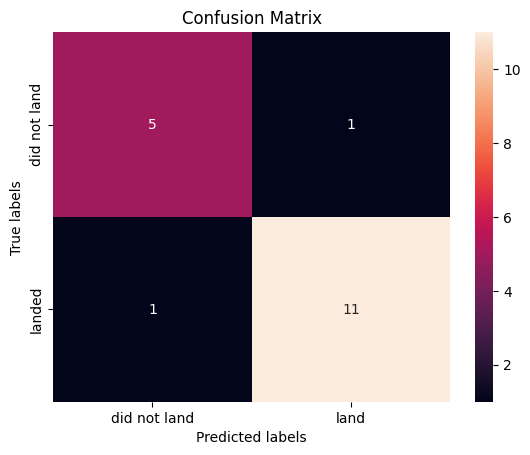

In [32]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Create KNN classifier
KNN = KNeighborsClassifier()

# Step 2: Define the parameters grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Step 3: Create GridSearchCV object
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Step 4: Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)  # Make sure to replace with your training data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [34]:
# Step 5: Print the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy:  0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Calculate accuracy on the test data
accuracy = knn_cv.score(X_test, Y_test)  # Replace X_test and Y_test with your test data
print("Accuracy of KNN on test data: {:.2f}%".format(accuracy * 100))

# Step 2: Make predictions on the test data
y_pred = knn_cv.predict(X_test)

Accuracy of KNN on test data: 83.33%


We can plot the confusion matrix


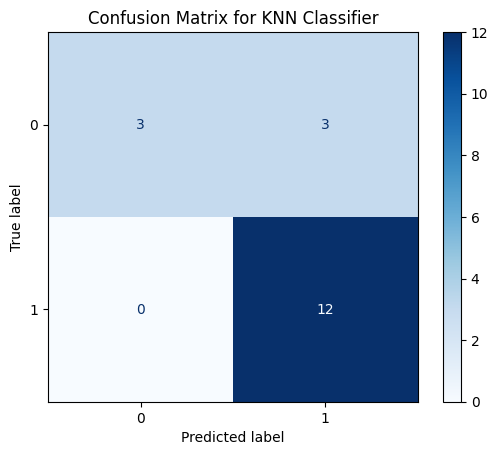

In [36]:
# Step 3: Plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)  # Replace Y_test with your actual test labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Classifier")
plt.show()


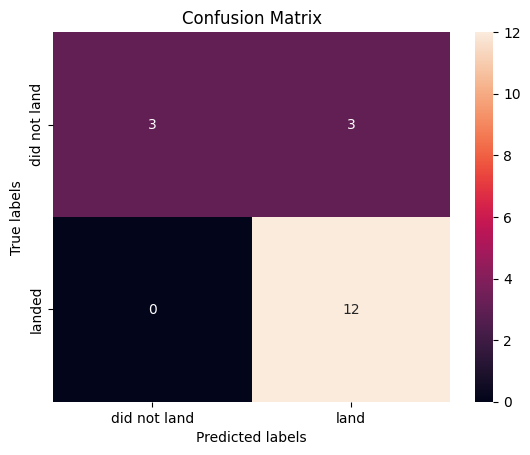

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have trained multiple models: tree_cv (Decision Tree) and knn_cv (KNN)
models = {
    "Decision Tree": tree_cv,
    "K-Nearest Neighbors": knn_cv
}

# Initialize a dictionary to hold performance metrics
results = {}

for model_name, model in models.items():
    # Calculate accuracy
    accuracy = model.score(X_test, Y_test)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(Y_test, y_pred, output_dict=True)
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - Accuracy: {metrics['accuracy']:.2f}")
    print(" - Classification Report:")
    print(metrics['classification_report'])
    print("\n")

# Find the best performing model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"The best performing model is: {best_model} with an accuracy of {results[best_model]['accuracy']:.2f}")


Decision Tree:
 - Accuracy: 0.89
 - Classification Report:
{'0': {'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1-score': 0.8333333333333334, 'support': 6.0}, '1': {'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1-score': 0.9166666666666666, 'support': 12.0}, 'accuracy': 0.8888888888888888, 'macro avg': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 18.0}, 'weighted avg': {'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1-score': 0.8888888888888888, 'support': 18.0}}


K-Nearest Neighbors:
 - Accuracy: 0.83
 - Classification Report:
{'0': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 6.0}, '1': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.8888888888888888, 'support': 12.0}, 'accuracy': 0.8333333333333334, 'macro avg': {'precision': 0.9, 'recall': 0.75, 'f1-score': 0.7777777777777777, 'support': 18.0}, 'weighted avg': {'precision': 0.8666666666666667, 'recall': 0.8333333333333334

<ipython-input-40-1abc6ef479d0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')


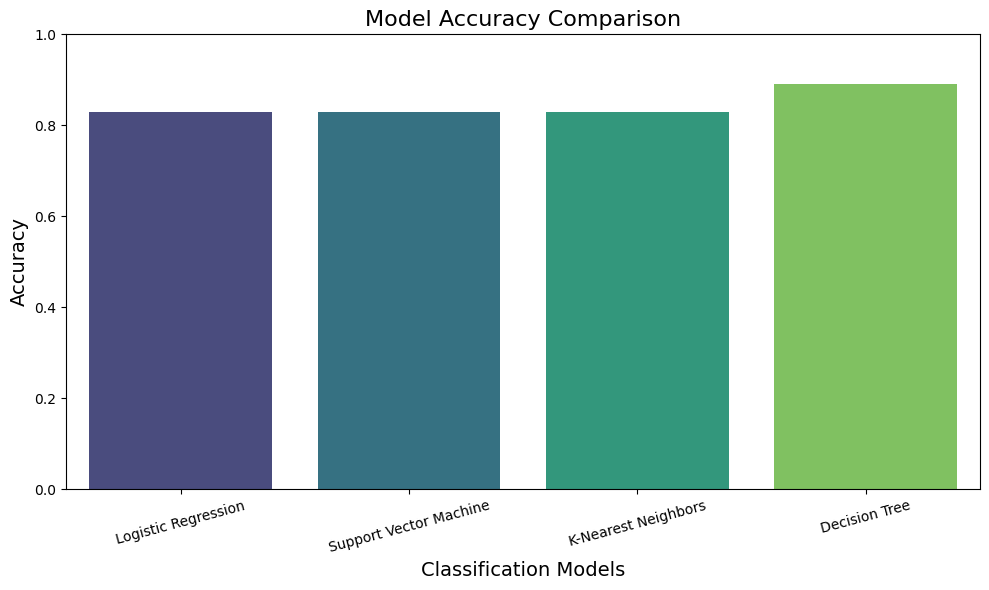

The model with the highest classification accuracy is: Decision Tree with an accuracy of 0.89


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: model names and their corresponding accuracies
models = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree']
accuracies = [0.83, 0.83, 0.83, 0.89]  # Replace these with actual accuracy values from your models

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Classification Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.xticks(rotation=15)

# Display the plot
plt.tight_layout()
plt.show()

# Find the model with the highest accuracy
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]
print(f"The model with the highest classification accuracy is: {best_model['Model']} with an accuracy of {best_model['Accuracy']:.2f}")


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
